In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [2]:
data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022.csv", parse_dates=['Tanggal'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))

C:\Users\wajit\AppData\Local\Temp\ipykernel_8764\3508010389.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022.csv", parse_dates=['Tanggal'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))


In [3]:
print(data)

        Tanggal OriginTime  Latitude  Longitude  Kedalaman (km)  Magnitude  \
0    2017-01-01   04:58:14   -8.9300   110.0500            10.0        4.0   
1    2017-01-01   06:43:49   -9.2800   113.8700            10.0        3.0   
2    2017-01-01   10:27:23   -9.0400   112.8700            10.0        3.3   
3    2017-01-01   15:18:49  -10.4600   112.5400            10.0        3.4   
4    2017-01-02   21:02:24   -8.9400   108.7500            10.0        5.3   
...         ...        ...       ...        ...             ...        ...   
6144 2022-12-31   09:10:44   -8.3038   109.0606            38.0        2.8   
6145 2022-12-31   12:40:34  -10.5269   112.1858            10.0        4.3   
6146 2022-12-31   15:01:21   -8.8896   112.4811            41.0        3.1   
6147 2022-12-31   17:21:53  -10.4633   113.1895            10.0        3.8   
6148 2022-12-31   18:13:14   -8.8052   109.5594            29.0        3.0   

     Type                                         Keterangan Di

In [4]:
data.describe()

,Tanggal,Latitude,Longitude,Kedalaman (km),Magnitude
count,6149,6149.000000,6149.000000,6149.000000,6149.000000
mean,2020-12-18 02:18:38.230606592,-8.879588,111.311699,30.002895,3.142739
min,2017-01-01 00:00:00,-12.690000,108.200000,1.000000,0.900000
25%,2019-06-09 00:00:00,-9.300000,110.370000,10.000000,2.800000
50%,2021-09-08 00:00:00,-8.881300,111.070000,14.000000,3.100000
75%,2022-07-12 00:00:00,-8.430000,112.720000,29.000000,3.500000
max,2022-12-31 00:00:00,0.767800,114.000000,715.000000,6.600000
std,NaN,0.838015,1.396364,51.434214,0.670986


In [5]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%H:%M:%S')
latitude = data["Latitude"]
longitude = data["Longitude"]
kedalaman = data["Kedalaman (km)"]
magnitude = data["Magnitude"]

In [6]:
checkpoint = ModelCheckpoint('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_1.h5', monitor='val_mae', verbose=1, save_best_only=True)

In [7]:
gempa_semua = []
for index in range(len(latitude)):
  gempa = []
  gempa.append(latitude[index])
  gempa.append(longitude[index])
  gempa.append(kedalaman[index])

  gempa_semua.append(gempa)

In [8]:
gempa_semua = np.array(gempa_semua)

In [9]:
print(gempa_semua)

[[ -8.93   110.05    10.    ]
 [ -9.28   113.87    10.    ]
 [ -9.04   112.87    10.    ]
 ...
 [ -8.8896 112.4811  41.    ]
 [-10.4633 113.1895  10.    ]
 [ -8.8052 109.5594  29.    ]]


In [10]:
magnitude = magnitude.astype('float64')

In [11]:
magnitude.dtype

dtype('float64')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(gempa_semua, magnitude, test_size=0.2, random_state=42)

In [13]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,),  kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [14]:
optimizer = Adam(learning_rate=0.001)

In [15]:
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [16]:
history = model.fit(X_train, y_train, batch_size=128, epochs=3000, verbose=1, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/3000
21/39 [===============>..............] - ETA: 0s - loss: 8.5949 - mae: 2.7976  
Epoch 1: val_mae improved from inf to 2.61245, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
39/39 [==============================] - 1s 9ms/step - loss: 7.4697 - mae: 2.5594 - val_loss: 7.3540 - val_mae: 2.6125
Epoch 2/3000
21/39 [===============>..............] - ETA: 0s - loss: 3.9585 - mae: 1.7405
Epoch 2: val_mae improved from 2.61245 to 1.45412, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
39/39 [==============================] - 0s 4ms/step - loss: 3.2049 - mae: 1.5258 - val_loss: 2.6390 - val_mae: 1.4541
Epoch 3/3000
24/39 [=================>............] - ETA: 0s - loss: 1.2103 - mae: 0.8844
Epoch 3: val_mae improved from 1.45412 to 1.03435, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
39/39 [==============================] - 0s 4ms/step - loss: 1.0672 - mae: 0.8215 - val_l

In [17]:
model = load_model("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_1.h5")
accuracy = model.evaluate(X_test, y_test)[1]
accuracy_percentage =accuracy * 100
print("Loss: ", accuracy_percentage)

39/39 [==============================] - 0s 894us/step - loss: 0.2685 - mae: 0.3704
Loss:  37.038981914520264


In [18]:
latitude_subset = latitude[:100]
longitude_subset = longitude[:100]
kedalaman_subset = kedalaman[:100]

In [19]:
count = 0  # Variable to count the number of predicted data
predictions = []  # List to store the predicted values

for i in range(len(latitude)):
    for j in range(len(longitude)):
        for k in range(len(kedalaman)):
            koordinat_latitude = float(latitude[i])
            koordinat_longitude = float(longitude[j])
            kedalaman_gempa = float(kedalaman[k])

            input_data = np.array([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
            hasil_prediksi = model.predict(input_data)

            # Append the predicted value to the list
            predictions.append(hasil_prediksi)

            # Increase the count by 1
            count += 1

            # Print the prediction
            print("Perkiraan kekuatan gempa {} Mg".format(hasil_prediksi))

            if count == 6149:
                break
        else:
            continue
        break
    else:
        continue
    break

# Convert the list of predictions to a NumPy array
predictions = np.array(predictions)

print("Banyaknya data yang diprediksi:", count)


1/1 [==============================] - 0s 97ms/step
Perkiraan kekuatan gempa [[3.0481837]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[3.0481837]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[3.0481837]] Mg
1/1 [==============================] - 0s 19ms/step
Perkiraan kekuatan gempa [[3.0481837]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[3.0481837]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[3.0481837]] Mg
1/1 [==============================] - 0s 15ms/step
Perkiraan kekuatan gempa [[3.0481837]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[3.0608382]] Mg
1/1 [==============================] - 0s 15ms/step
Perkiraan kekuatan gempa [[3.0481837]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[3.0481837]] Mg
1/1 [==============================] - 0s 18ms/step
Perkiraa

In [20]:
#koordinat_latitude = float(input("Masukkan koordinat latitude anda : "))
#koordinat_longitude = float(input("Masukkan koordinat longitude anda: "))
#kedalaman_gempa = float(input("Masukkan Kedalaman Gempa dalam (Km): "))

In [21]:
#prediksi_gempa = model.predict([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
#print("Perkiraan kekuatan gempa {} Mg".format(prediksi_gempa))

In [22]:
print(predictions)

[[[3.0481837]]

 [[3.0481837]]

 [[3.0481837]]

 ...

 [[3.1547277]]

 [[3.0481837]]

 [[3.0937831]]]


In [23]:
flattened_array = predictions.flatten()

In [24]:
magnitude_subset = magnitude[:100]

In [25]:
print(magnitude_subset)

0     4.0
1     3.0
2     3.3
3     3.4
4     5.3
     ... 
95    3.5
96    2.4
97    4.0
98    3.1
99    5.0
Name: Magnitude, Length: 100, dtype: float64


In [26]:
x = data['Tanggal']
y_data_asli = magnitude
y_data_forecasted = flattened_array

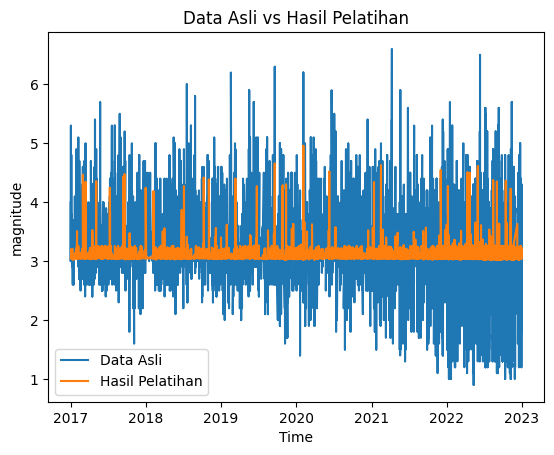

In [27]:
plt.plot(x, y_data_asli, label='Data Asli')
plt.plot(x, y_data_forecasted, label='Hasil Pelatihan')
plt.xlabel('Time')
plt.ylabel('magnitude')
plt.title('Data Asli vs Hasil Pelatihan')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend()
plt.show()

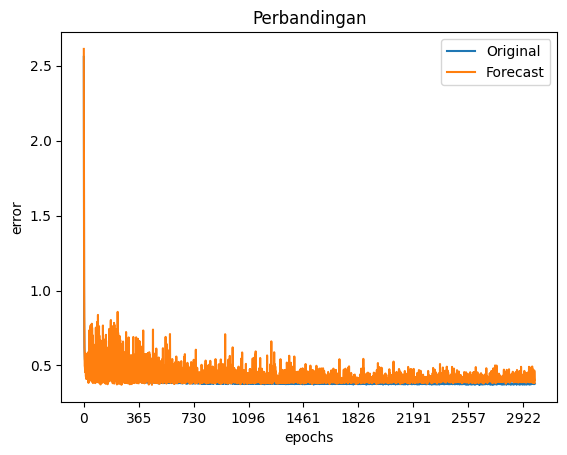

In [28]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Perbandingan')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend(['Original', 'Forecast'], loc='upper right')
plt.show()